# **Bharat Intern**
## **Data Science** 
## Task 3: Number Recognition
## Name: Sanal P K


## About Dataset
The MNIST database is a large database of handwritten digits that is commonly used for training various image processing systems.The database is also widely used for training and testing in the field of machine learning.

In [4]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import unique , argmax

# TensorFlow already contain MNIST data set which can be loaded using Keras
import tensorflow as tf # installing tenserflow
from tensorflow import keras

In [5]:
# To Load the MNIST dataset from the Keras API provided by TensorFlow.
mnist = tf.keras.datasets.mnist

## Train and Test data.

In [6]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [7]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [8]:
print(x_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [9]:
print(x_test)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [10]:
# Reshaping the input Data which is used as a input in CNN in Tenserflow
# CNN takes the input Data in 4D Format with the shape (num_samples, image_height, image_width, num_channels)
# Here (num_channels) is set to 1 which means input image is Grayscale.

x_train = x_train.reshape((x_train.shape[0] , x_train.shape[1] , x_train.shape[2],1))
x_test = x_test.reshape((x_test.shape[0] , x_test.shape[1] , x_test.shape[2],1))
print(x_train.shape)
print(x_test.shape)
print(x_train.dtype)
print(x_test.dtype)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
uint8
uint8


In [11]:
# Normalizing Pixel Values

x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0
print(x_train.dtype)
print(x_test.dtype)

float32
float32


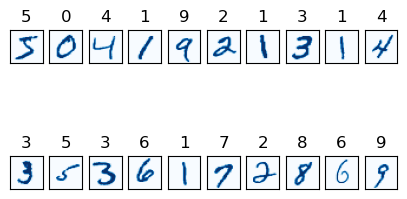

In [12]:
# Visulaizing Subsets of images in MNIST Dataset along with coressponding labels.

fig=plt.figure(figsize=(5,3))
for i in range(20):
    ax =fig.add_subplot(2,10,i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]), cmap='Blues')
    ax.set_title(y_train[i])

In [13]:
# showing shape of single image
img_shape= x_train.shape[1:]
img_shape

(28, 28, 1)

## BUILDING NEURAL NETWORK

In [14]:
# Creating aSequential Model in Keras
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


This summary shows that the model has four layers:

1) A Flatten layer that flattens the input images to a 1D array of length 784.
2) A Dense layer with 128 units and ReLU activation.
3) A Dropout layer that randomly sets 20% of the input units to 0 during training.
4) A second Dense layer with 10 units and no activation function.

In [34]:
# Displaying Neural Network Model
from tensorflow.keras.utils import plot_model
plot_model(model, 'model.jpg', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [17]:
# Making Prediction on Model
prediction = model(x_train[:1]).numpy()
prediction

array([[ 0.28852144,  0.85627306, -0.5477668 , -0.53288394, -0.03044954,
        -0.59838474,  0.14389037, -0.24289528,  0.673275  ,  0.4178701 ]],
      dtype=float32)

In [18]:
# Applying Softmax() Function to prediction array
# This convert an output vector of real numbers into a probability distribution over predicted classes
tf.nn.softmax(prediction).numpy()

array([[0.1131644 , 0.19965546, 0.04903593, 0.04977118, 0.08225881,
        0.0466156 , 0.09792584, 0.06651483, 0.16626702, 0.1287909 ]],
      dtype=float32)

In [19]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], prediction).numpy()
model.compile(optimizer='adam',loss=loss_fn,metrics=['accuracy'])

## Model Fitting

In [20]:
# Training the Model
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2928 - accuracy: 0.9154
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1408 - accuracy: 0.9582
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1049 - accuracy: 0.9680
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0846 - accuracy: 0.9742
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0731 - accuracy: 0.9768


In [21]:
# Evaluating the Model
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0721 - accuracy: 0.9790 - 942ms/epoch - 3ms/step


[0.07208201289176941, 0.9789999723434448]

In [22]:
# Creating a new sequential model which includes both previously trained model and softmax layer.
probability_model = tf.keras.Sequential([ model,tf.keras.layers.Softmax() ])
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.7918174e-07, 3.8648369e-09, 2.2063390e-05, 1.3576401e-04,
        1.4986391e-11, 1.0300204e-07, 1.9689250e-11, 9.9983895e-01,
        4.7904781e-08, 2.8349616e-06],
       [2.6035245e-09, 7.0005326e-06, 9.9998057e-01, 8.6030900e-07,
        8.7487145e-15, 1.1525099e-05, 1.0644751e-09, 1.5233804e-16,
        1.8152466e-08, 6.3358551e-16],
       [8.6052495e-08, 9.9887747e-01, 4.3289686e-04, 1.1268815e-05,
        2.5341900e-05, 3.8414105e-06, 3.0406727e-06, 5.3760409e-04,
        1.0795445e-04, 5.3197454e-07],
       [9.9993551e-01, 5.2451204e-10, 2.2280383e-05, 2.4515234e-06,
        1.8139362e-08, 9.9601891e-07, 3.8023405e-05, 2.4765836e-07,
        3.9678696e-08, 3.8270750e-07],
       [6.6867001e-06, 1.3953128e-09, 1.6823416e-05, 8.1731861e-07,
        9.9461764e-01, 8.9262255e-07, 4.4437696e-05, 8.2269828e-05,
        2.4493841e-06, 5.2279998e-03]], dtype=float32)>

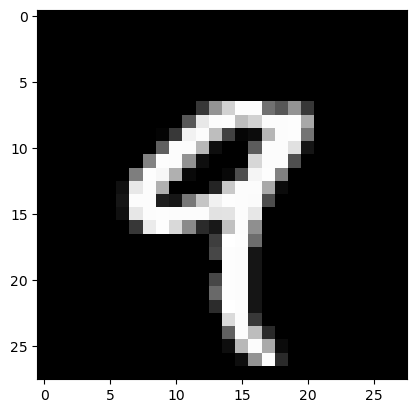

In [32]:
# Displaying a Grayscale Image
img = x_train[4]
plt.imshow(np.squeeze(img) ,cmap='gray')
plt.show()

In [33]:
# Predicting the Result
img= img.reshape(1, img.shape[0],img.shape[1],img.shape[2])
p= model.predict([img])
print("predicted : {}".format(argmax(p)))

1/1 [==============================] - 0s 41ms/step
predicted : 9
